# Data Observation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
train_set = []
label_set = []

train_file = open('item_recom/train_info.tsv', 'r')

for iter_line in open('item_recom/train_info.tsv'):
    line = train_file.readline()
    line = line.split('\t')
    train_set.append((
        int(line[0]), # user id
        int(line[1]), # item id
        int(line[2]), # week
        int(line[3]), # time of the day
        int(line[4]), # feature 1
        int(line[5]), # feature 2
     ))
    label_set.append(float(line[6]))

## Features

In [3]:
train_feat1 = np.array(list(map(lambda x:x[4], train_set)))
train_feat2 = np.array(list(map(lambda x:x[5], train_set)))

In [16]:
print train_feat1.max() + train_feat2.max() + 1 + 1 + 94317 + 99782 + 2

240898


In [7]:
num_data = 100000
# plt.plot(range(num_data), train_feat1[:num_data], 'ro')
# plt.plot(range(num_data), train_feat2[:num_data], 'bo')

## User Behaviour

In [8]:
# Count number of records for each user

num_record = np.zeros(train_set[-1][0] + 1)
for rec in train_set:
    num_record[rec[0]] += 1

np.mean(num_record)

63.344359977522608

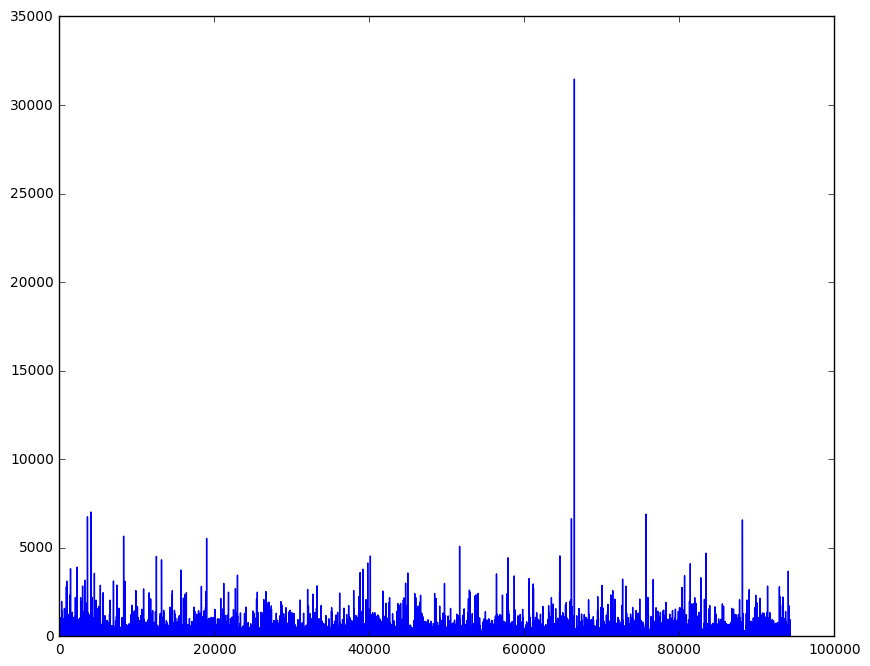

In [9]:
plt.plot(num_record)

In [10]:
print "There are", num_record[num_record<3].size, "people watched less than 3 movies"
print "There are", num_record[num_record<10].size, "people watched less than 10 movies"
print "There are", num_record[num_record<50].size, "people watched less than 50 movies"
print "There are", num_record[num_record<100].size, "people watched less than 100 movies"
print "There are", num_record[num_record<500].size, "people watched less than 500 movies"
print "There are", num_record[num_record>1000].size, "people watched over 1000 movies"

There are 11432 people watched less than 3 movies
There are 36486 people watched less than 10 movies
There are 68859 people watched less than 50 movies
There are 80123 people watched less than 100 movies
There are 92568 people watched less than 500 movies
There are 513 people watched over 1000 movies


In [11]:
bad_label = []
for ind in xrange(len(train_set)):
    if train_set[ind][0] == 66443:
        bad_label.append(label_set[ind])

In [12]:
print "This guy watched", len(bad_label), "movies"
bad_label = np.array(bad_label)
print "Mean rating", np.mean(bad_label)
print "Max rating", bad_label.max()
print "And", bad_label[bad_label==0].size, "zero ratings"

This guy watched 31462 movies
Mean rating 0.959697412752
Max rating 5.0
And 17864 zero ratings


## About Movies

In [69]:
# Count number of records for each user

N_mov = np.array(list(map(lambda x:x[1], train_set))).max()
print N_mov

num_record_mov = np.zeros(N_mov + 1)
for rec in train_set:
    num_record_mov[rec[1]] += 1

print np.mean(num_record_mov)

99781
59.8750275601


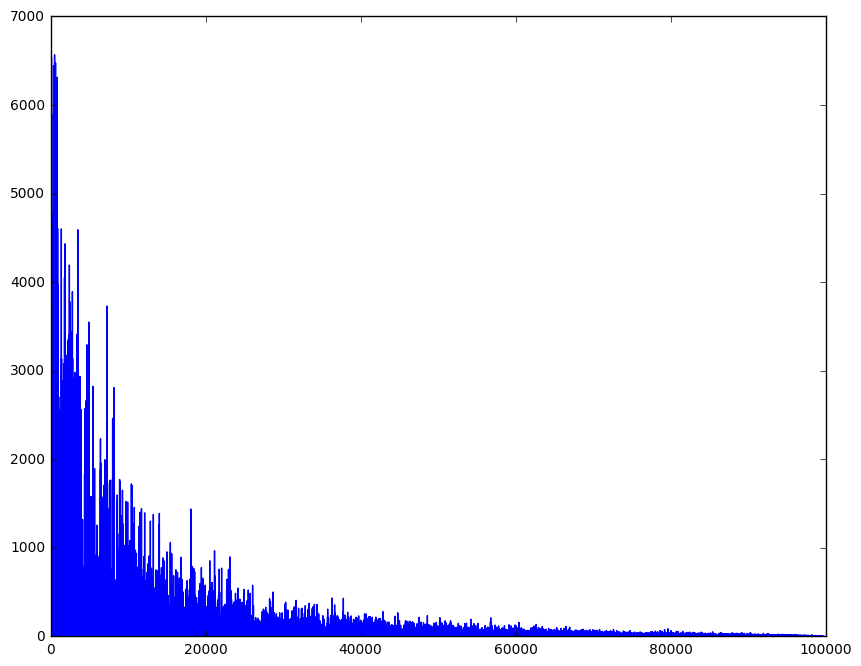

In [70]:
plt.plot(num_record_mov)

In [77]:
print "There are", num_record_mov[num_record_mov<3].size, "movies watched by less than 3 people"
print "There are", num_record_mov[num_record_mov<10].size, "movies watched by less than 10 people"
print "There are", num_record_mov[num_record_mov<50].size, "movies watched by less than 50 people"
print "There are", num_record_mov[num_record_mov<100].size, "movies watched by less than 100 people"
print "There are", num_record_mov[num_record_mov<500].size, "movies watched by less than 500 people"
print "There are", num_record_mov[num_record_mov>1000].size, "movies watched by over 1000 people"

There are 2644 movies watched by less than 3 people
There are 30043 movies watched by less than 10 people
There are 78720 movies watched by less than 50 people
There are 89097 movies watched by less than 100 people
There are 97880 movies watched by less than 500 people
There are 793 movies watched by over 1000 people


## Ratings?

In [80]:
label_set = np.array(label_set)
print label_set.mean()

 2.43790457699


In [85]:
for rating in xrange(11):
    print "# rating of", rating/2.0, label_set[label_set==rating/2.0].size

# rating of 0.0 1794821
# rating of 0.5 39236
# rating of 1.0 32059
# rating of 1.5 530112
# rating of 2.0 33651
# rating of 2.5 756170
# rating of 3.0 71643
# rating of 3.5 789558
# rating of 4.0 137990
# rating of 4.5 1431650
# rating of 5.0 357560


## How to understand features?

In [104]:
# check for a certain movie
# Yes! They're movie's feature

mov_feat1_0 = []

for ind in xrange(len(train_set)):
    if train_set[ind][1] == 423:
        mov_feat1_0.append(train_set[ind][5])

mov_feat1_0 = np.array(mov_feat1_0)
print mov_feat1_0.mean()
# print mov_feat1_0

43.0


In [106]:
mov_feat1 = np.zeros(99781 + 1)
mov_feat2 = np.zeros(99781 + 1)

for ind in xrange(len(train_set)):
    m_ind = train_set[ind][1]
    mov_feat1[m_ind] = train_set[ind][4]
    mov_feat2[m_ind] = train_set[ind][5]

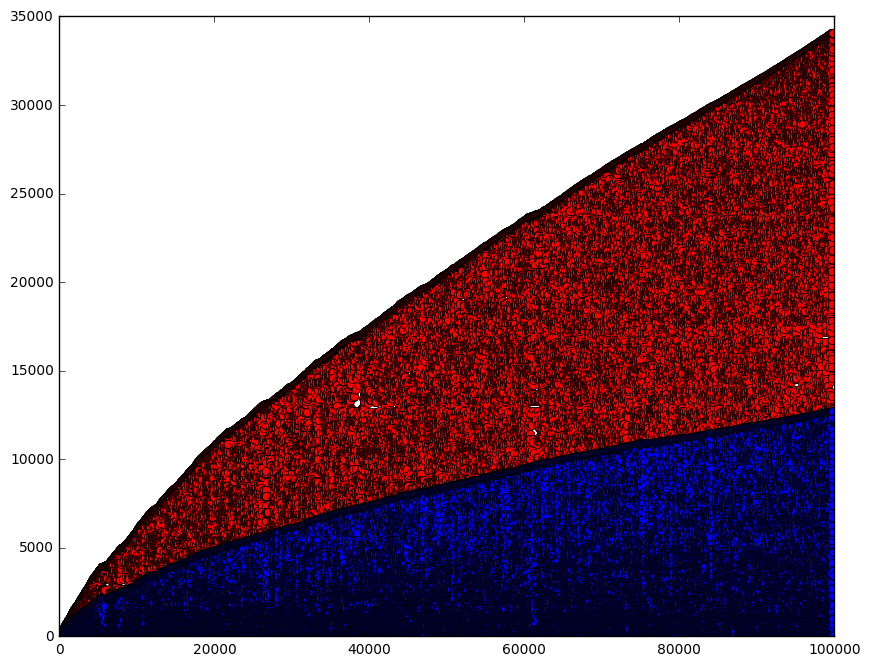

In [112]:
plt.plot(mov_feat1, 'ro')
plt.plot(mov_feat2, 'bo')